# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


# Read dataset

In [8]:
netflix_data=pd.read_csv("netflix_titles_2021.csv")

In [9]:
print("Data Properties: ", netflix_data.shape, netflix_data.columns)

Data Properties:  (8807, 12) Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
netflix_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Cleaning & Formatting

In [14]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
netflix_data.duplicated().sum()

0

In [16]:
netflix_data.dropna(subset=['director','cast','country','date_added','rating','duration'], inplace=True)

In [17]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Datetime format conversion

In [18]:
df = pd.DataFrame(netflix_data)

#convert the 'date-added'column to a pandas datetime object
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
netflix_data=pd.DataFrame(df)

In [20]:
netflix_data['day_added'] = netflix_data['date_added'].dt.day
netflix_data['year_added'] =netflix_data['date_added'].dt.year
netflix_data['month_added']=netflix_data['date_added'].dt.month_name()
netflix_data['year_added'].astype(int);
netflix_data['day_added'].astype(int);


In [21]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,September
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,September
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,September
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,September
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,2016,March
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,2019,November
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,2019,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,2020,January


## Total number of Movies and TV shows

In [22]:
types=netflix_data.groupby(['type'])['type'].count().reset_index(name="count")
types=types.set_index('type')
types

,count
type,
Movie,5185
TV Show,147


## Top 10 Directors

In [23]:
director_data=netflix_data.groupby(['director','type'])['director'].count().reset_index(name='show_count').sort_values(by='show_count',ascending=False)
director_data=director_data.set_index('director')
director_data

,type,show_count
director,,
"Raúl Campos, Jan Suter",Movie,18
Jay Karas,Movie,14
Marcus Raboy,Movie,14
Cathy Garcia-Molina,Movie,13
Youssef Chahine,Movie,12
...,...,...
Jonás Trueba,Movie,1
Jordan Brady,Movie,1
Jordan Ross,Movie,1


In [24]:
director_data['show_count'].max()

18

In [25]:
top10_directors=director_data.query('show_count>=9')
top10_directors

,type,show_count
director,,
"Raúl Campos, Jan Suter",Movie,18
Jay Karas,Movie,14
Marcus Raboy,Movie,14
Cathy Garcia-Molina,Movie,13
Youssef Chahine,Movie,12
Jay Chapman,Movie,12
Martin Scorsese,Movie,12
Steven Spielberg,Movie,11
Don Michael Paul,Movie,10


## Movies and TV Shows rating

In [36]:
rating_movie = netflix_data.groupby(['rating', 'type'])['rating'].count().reset_index(name='ratings_count').sort_values(by='ratings_count', ascending=False)
rating_movie = rating_movie.set_index('rating')

# Filter movies
filter_movies = rating_movie["type"] == "Movie"
rating_movie = rating_movie[filter_movies]



print(rating_movie.iloc[3:])


           type  ratings_count
rating                        
PG-13     Movie            470
TV-PG     Movie            416
PG        Movie            275
TV-G      Movie             81
TV-Y      Movie             71
TV-Y7     Movie             70
NR        Movie             58
G         Movie             40
TV-Y7-FV  Movie              3
UR        Movie              3
NC-17     Movie              2


In [38]:
rating_TV= netflix_data.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count').sort_values(by='ratings_count',ascending=False)
rating_TV=rating_TV.set_index('rating')


rating_TV = rating_movie["type"] == "TV Show"
rating_TV= rating_TV.dropna()
rating_TV

rating
TV-MA       False
TV-14       False
R           False
PG-13       False
TV-PG       False
PG          False
TV-G        False
TV-Y        False
TV-Y7       False
NR          False
G           False
TV-Y7-FV    False
UR          False
NC-17       False
Name: type, dtype: bool

## Country wise produced movies and tv shows


In [39]:
country_counts = netflix_data.groupby(['country', 'type'])['type'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)
country_counts


,country,type,counts
520,United States,Movie,1819
204,India,Movie,868
438,United Kingdom,Movie,164
47,Canada,Movie,104
120,Egypt,Movie,90
...,...,...,...
231,"Indonesia, United States",Movie,1
230,"Indonesia, United Kingdom",Movie,1
229,"Indonesia, South Korea, Singapore",Movie,1
227,"Indonesia, Netherlands",Movie,1


In [40]:
country_counts.describe()

,counts
count,637.000000
mean,8.370487
std,80.639724
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1819.000000


In [41]:
top10_countrycounts = country_counts[country_counts['counts'] >= 10]

top10_countrycounts = top10_countrycounts.sort_values(by='counts', ascending=False)

top10_countrycounts.head(10)


,country,type,counts
520,United States,Movie,1819
204,India,Movie,868
438,United Kingdom,Movie,164
47,Canada,Movie,104
120,Egypt,Movie,90
308,Nigeria,Movie,84
379,Spain,Movie,84
226,Indonesia,Movie,76
425,Turkey,Movie,74
325,Philippines,Movie,73


In [42]:
top10_countrycounts.describe()

,counts
count,47.000000
mean,94.723404
std,285.763562
min,10.000000
25%,14.000000
50%,29.000000
75%,65.500000
max,1819.000000


In [43]:
country_counts['counts'].max()

1819

In [44]:
country_counts['country'][country_counts['counts']==1819]

520    United States
Name: country, dtype: object

In [48]:
_movie= netflix_data.groupby(['country','type'])['country'].count().reset_index(name='count').sort_values(by='count', ascending=False)
_movie=_movie.set_index('country')


filter = _movie["type"]=="Movie"

# filtering data
_movie = _movie[filter]
_movie= _movie.dropna()
_movie

,type,count
country,,
United States,Movie,1819
India,Movie,868
United Kingdom,Movie,164
Canada,Movie,104
Egypt,Movie,90
...,...,...
"Indonesia, United States",Movie,1
"Indonesia, United Kingdom",Movie,1
"Indonesia, South Korea, Singapore",Movie,1


In [49]:
_movie= netflix_data.groupby(['country','type'])['country'].count().reset_index(name='count').sort_values(by='count', ascending=False)
_movie=_movie.set_index('country')


filter = _movie["type"]=="TV Show"

# filtering data
_movie = _movie[filter]
_movie= _movie.dropna()
_movie

,type,count
country,,
United States,TV Show,27
United Kingdom,TV Show,19
Japan,TV Show,10
South Korea,TV Show,10
India,TV Show,7
Spain,TV Show,7
Taiwan,TV Show,7
Thailand,TV Show,5
Turkey,TV Show,5


In [50]:
category_counts = netflix_data['country'].str.split(', ').explode().value_counts()
category_counts


United States      2485
India               940
United Kingdom      484
Canada              295
France              293
                   ... 
United Kingdom,       1
Slovakia              1
Bermuda               1
Ecuador               1
Montenegro            1
Name: country, Length: 113, dtype: int64

## Movies and TV Shows under different categories

In [51]:
category_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts()
category_counts


International Movies            2369
Dramas                          2293
Comedies                        1553
Action & Adventure               806
Independent Movies               740
Romantic Movies                  579
Thrillers                        547
Children & Family Movies         503
Documentaries                    391
Horror Movies                    336
Stand-Up Comedy                  294
Music & Musicals                 292
Sci-Fi & Fantasy                 236
Sports Movies                    156
Classic Movies                   108
International TV Shows            87
LGBTQ Movies                      80
Cult Movies                       69
Anime Features                    61
Faith & Spirituality              58
TV Dramas                         52
Crime TV Shows                    38
TV Comedies                       30
British TV Shows                  21
Romantic TV Shows                 21
Movies                            20
Docuseries                        14
K

In [52]:
category_data=netflix_data.groupby(['listed_in','type'])['type'].count().reset_index(name='show_counts')
category_data

,listed_in,type,show_counts
0,Action & Adventure,Movie,127
1,"Action & Adventure, Anime Features, Children &...",Movie,4
2,"Action & Adventure, Anime Features, Classic Mo...",Movie,1
3,"Action & Adventure, Anime Features, Horror Movies",Movie,1
4,"Action & Adventure, Anime Features, Internatio...",Movie,33
...,...,...,...
330,"TV Comedies, TV Dramas",TV Show,1
331,TV Dramas,TV Show,1
332,"TV Horror, TV Mysteries, TV Thrillers",TV Show,1
333,TV Shows,TV Show,5


In [53]:
category_data['show_counts'].max()

336

In [54]:
category_data['listed_in'][category_data['show_counts']==362]

Series([], Name: listed_in, dtype: object)

In [55]:
yearly_data=netflix_data.groupby(['release_year', 'type'])['type'].count().reset_index(name='count')
yearly_data



,release_year,type,count
0,1942,Movie,1
1,1944,Movie,1
2,1945,Movie,1
3,1946,Movie,1
4,1947,Movie,1
...,...,...,...
82,2019,TV Show,24
83,2020,Movie,409
84,2020,TV Show,33
85,2021,Movie,146


# Visualization

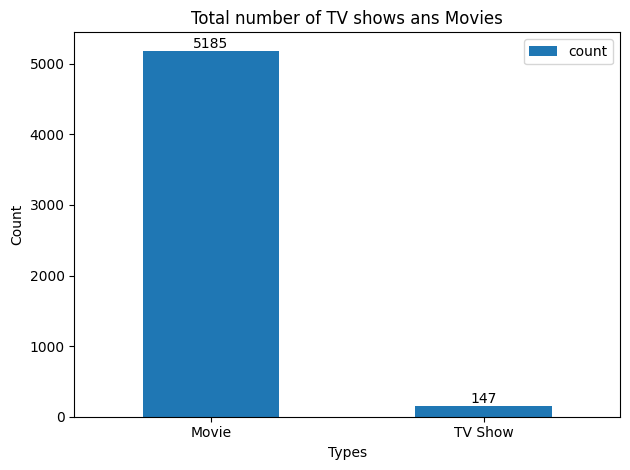

In [56]:
ax=types.plot(kind='bar')
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Total number of TV shows ans Movies')
plt.xticks(rotation=0)
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


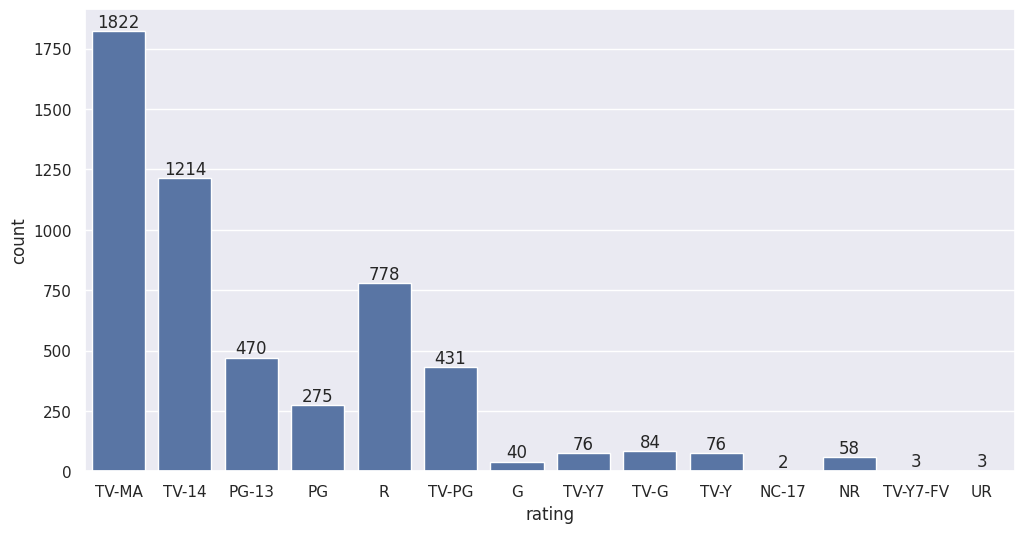

In [57]:
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.countplot(x='rating', data=netflix_data)
for bars in ax.containers:
    ax.bar_label(bars)


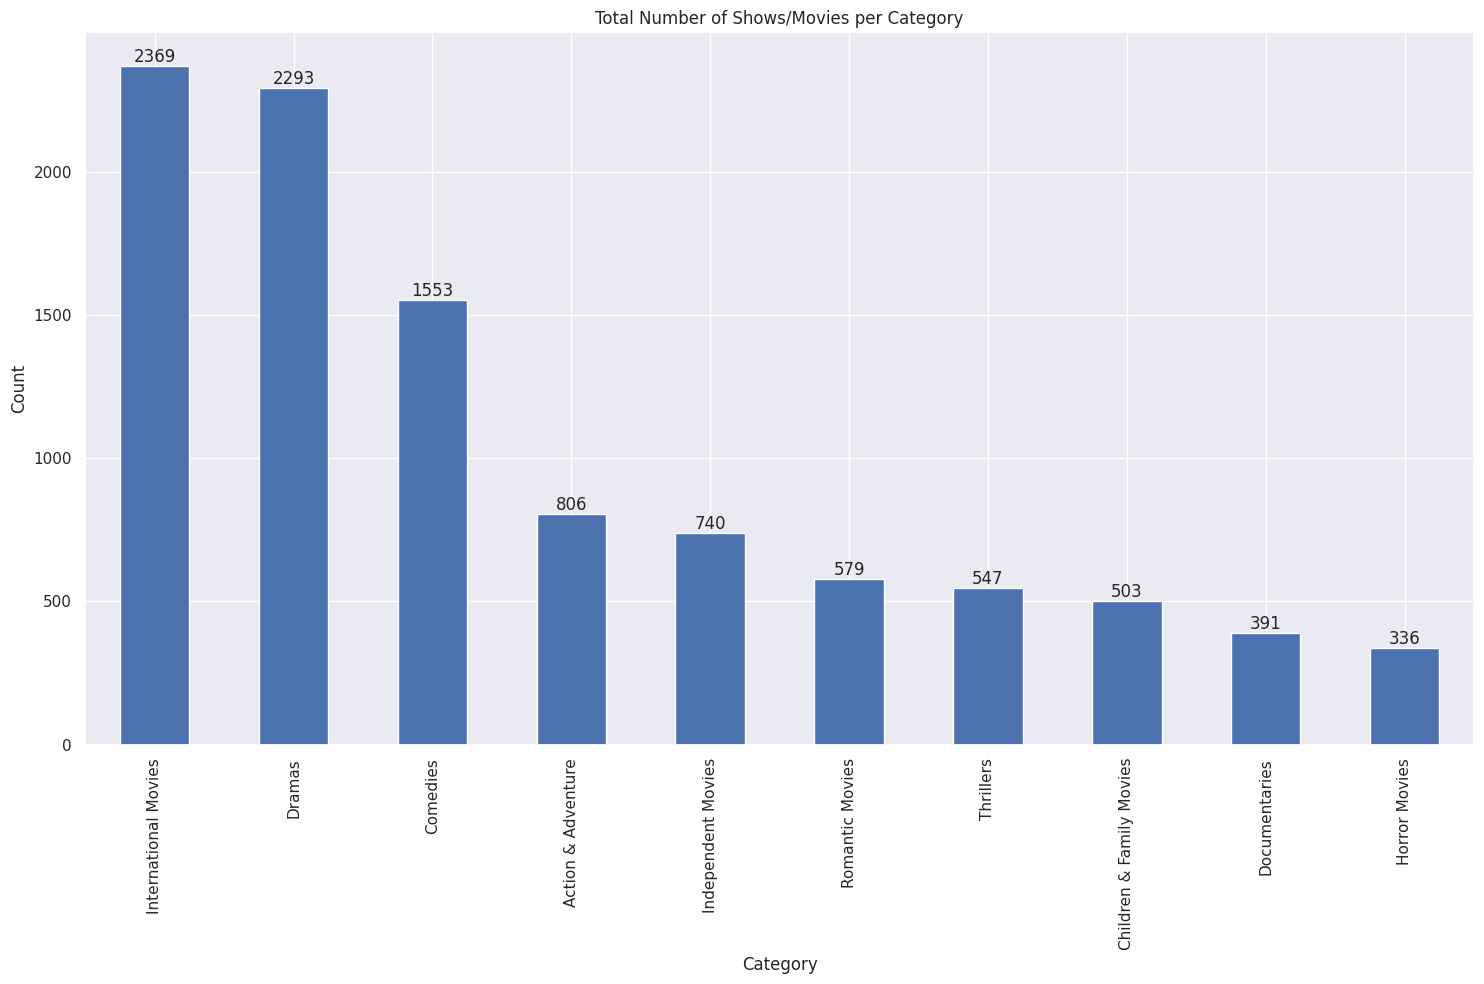

In [58]:
plt.figure(figsize=(15, 10))
ax=category_counts.head(10).plot(kind='bar')
plt.title('Total Number of Shows/Movies per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

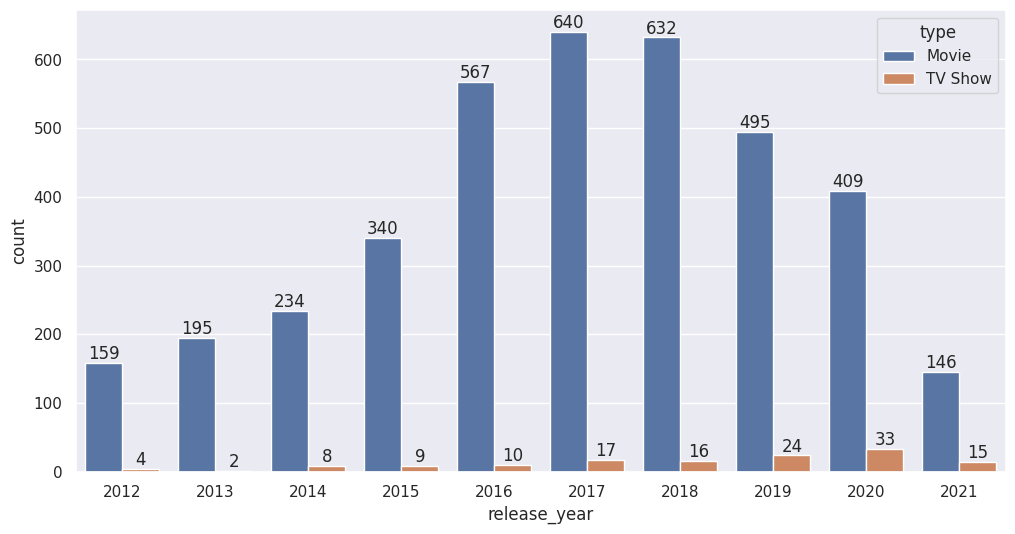

In [59]:
ax=sns.barplot(data=yearly_data.tail(20), hue='type', x='release_year', y='count')
sns.set(rc={'figure.figsize':(28,6)})
for bars in ax.containers:
    ax.bar_label(bars)


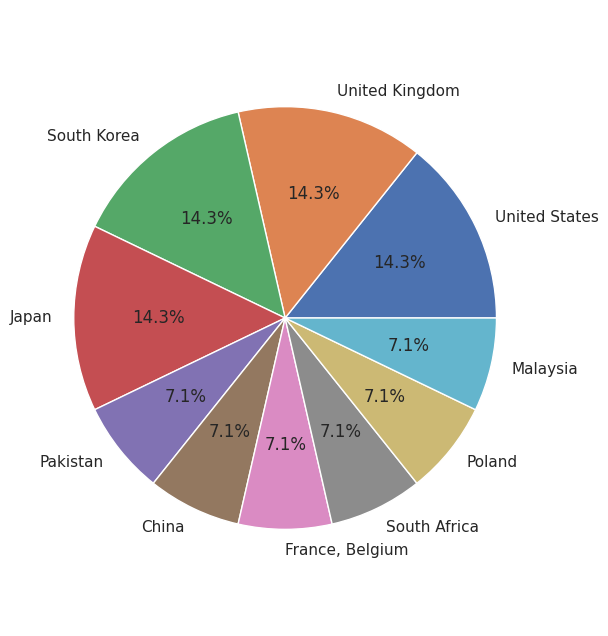

In [60]:
country_counts = top10_countrycounts['country'].value_counts().head(10)
plt.figure(figsize=(6, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

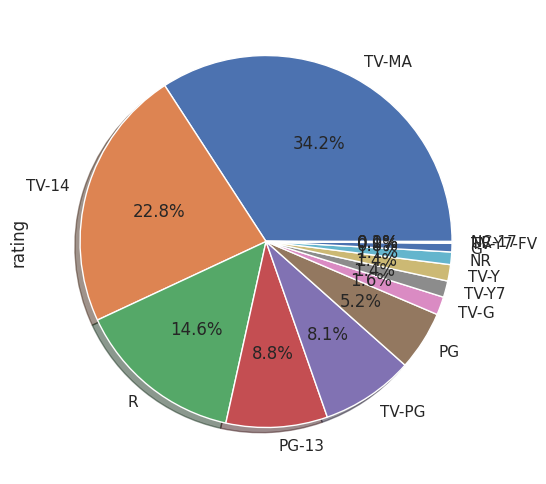

In [61]:
netflix_data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,8))
plt.show()

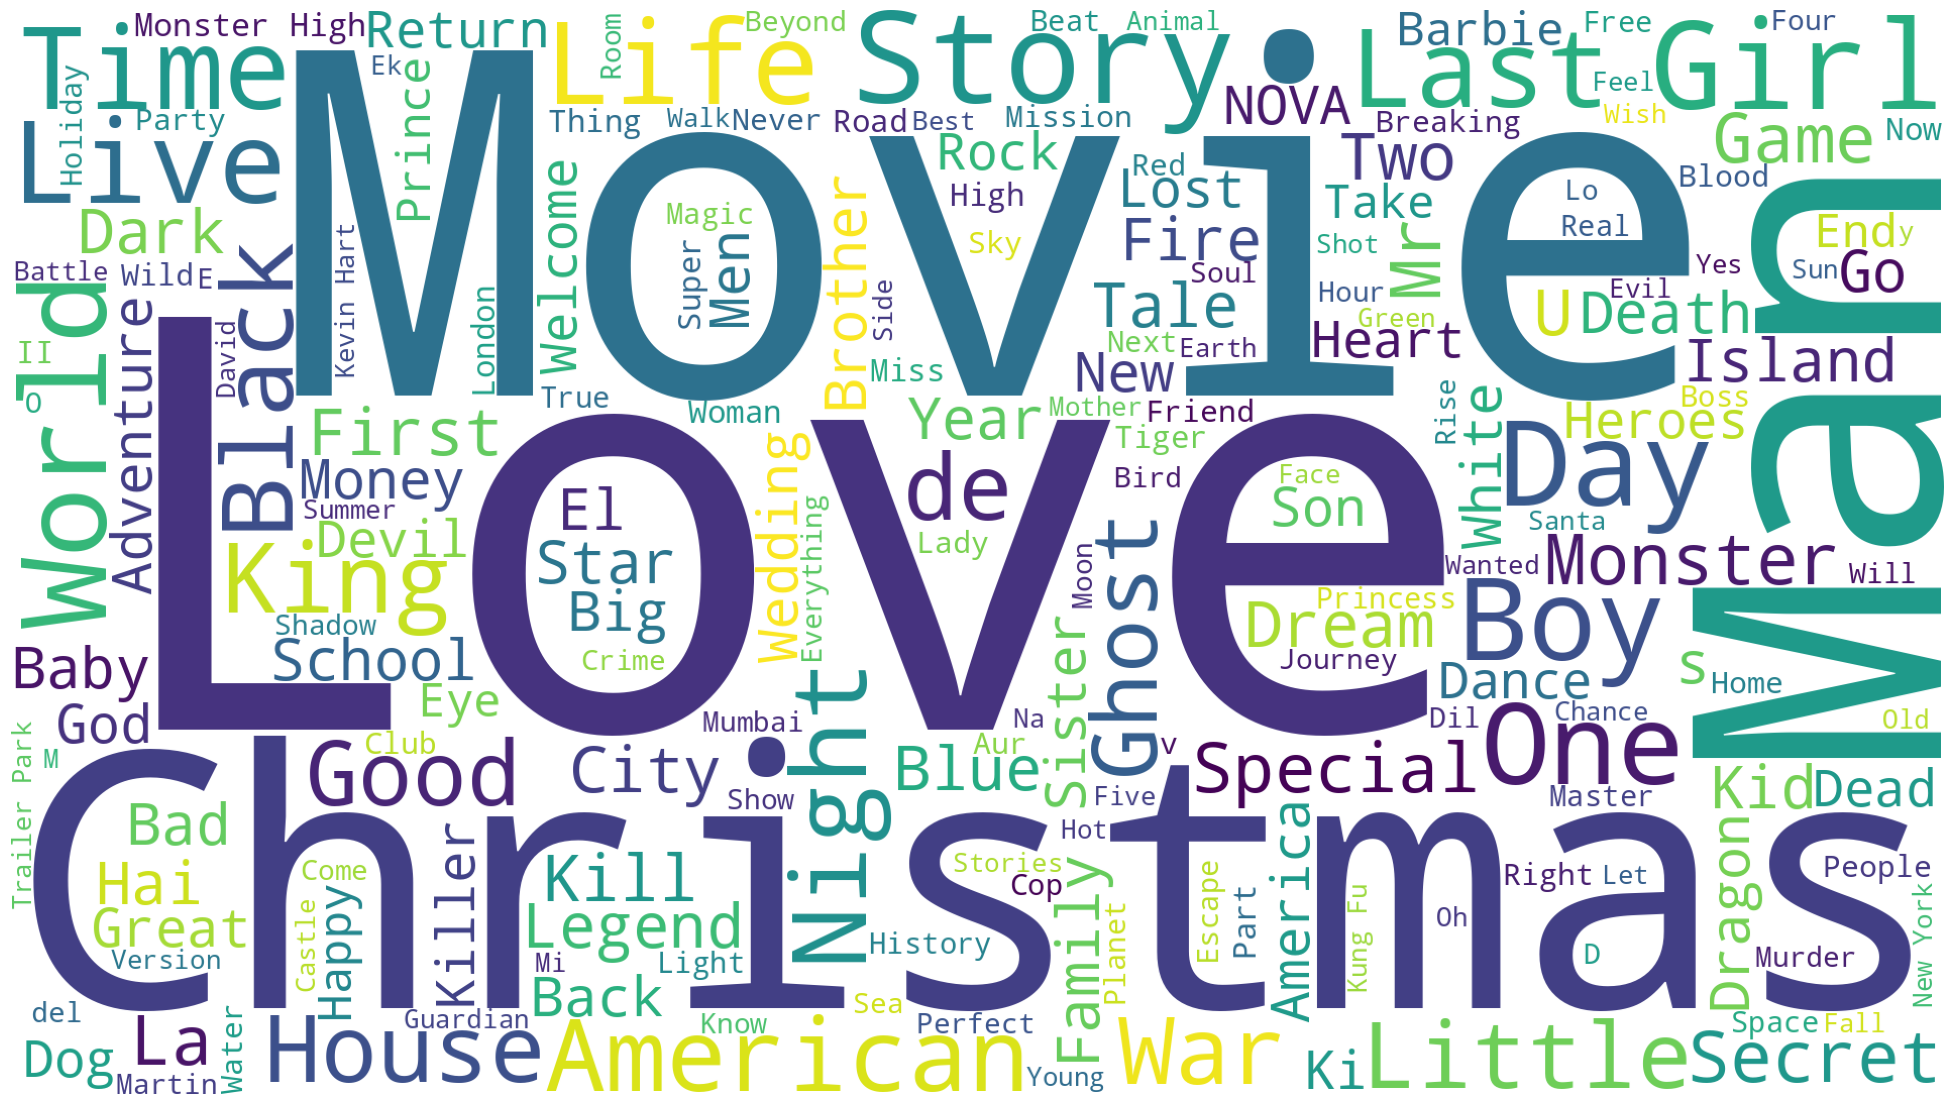

In [62]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix_data.title))
plt.imshow(wordcloud)
plt.savefig('title.png')
plt.axis('off')
plt.show()

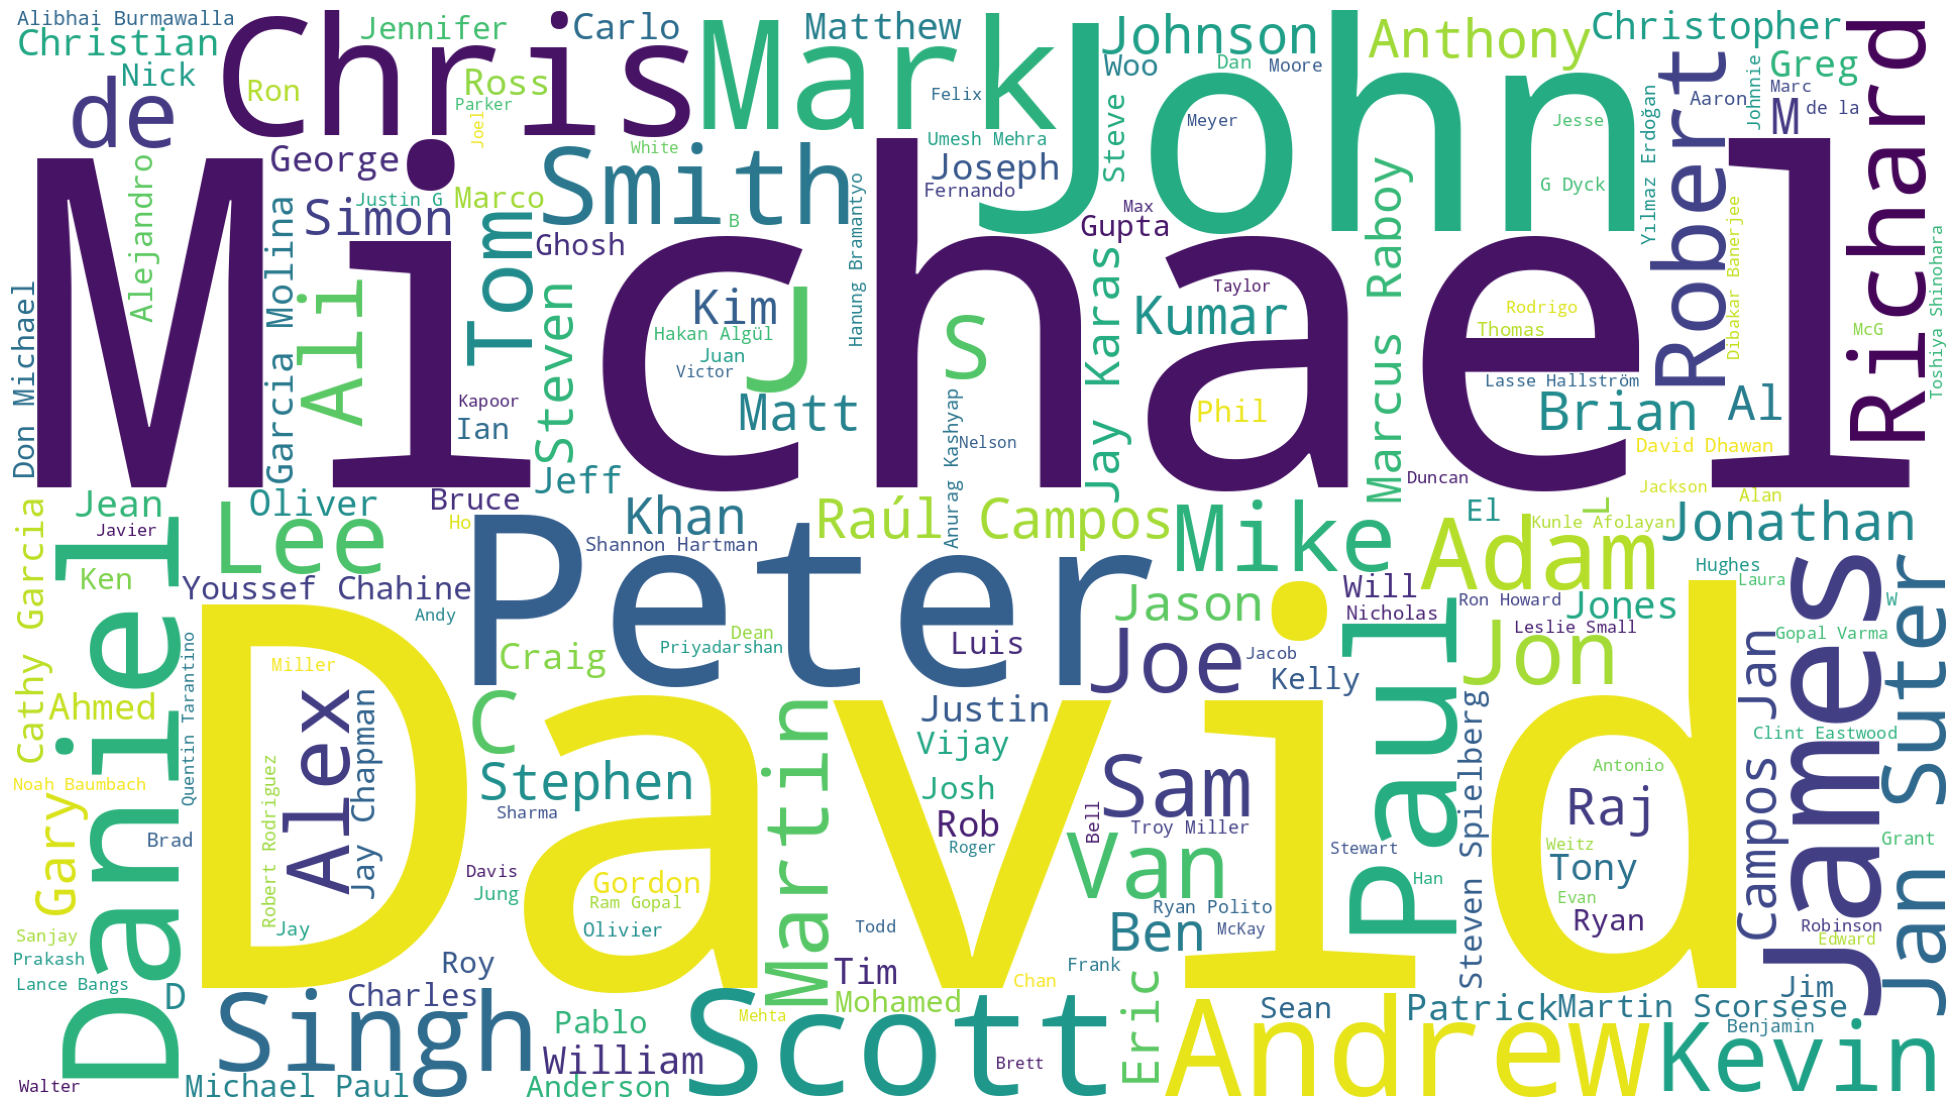

In [63]:

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix_data.director))
plt.imshow(wordcloud)
plt.savefig('director.png')
plt.axis('off')
plt.show()

In [64]:
netflix_data['release_year'].max()

2021

# Insights from the analysis

- On Netflix 6131 movies and 2676 TV shows are released between 1942 and 2021.

- Raúl Campos and Jan Suter has directed maximum number of movies together , they directed over 18 movies.

- Among all the movies released on Netflix 470 movies are rated as PG_13, 416 movies as TV_PG and 275 movies as PG.

- Among all the TV shows released on Netflix 81 TV shows are rated as TV-MA, 37 TV shows as TV-14 and 15 TV shows as TV-PG.

- From 1942 to 2021 United States has released 1819 movies and 27 TV shows.

- By collaborating with other countries United States has released overall 3689 movies and TV shows.

- Among all the movies and TV shows released on Netflix 2752 are lised in International movies category, 2427 under Dramas and 1674 under Comedies.

- Over these last decade more number of movies are released in 2017 and 2018, more TV shows in 2020.